In [19]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from scipy.interpolate import griddata


In [20]:
def generateNumpyData(size = 1000, test=False):
    def a2m(a):
        return np.matrix(a).T
    
    xtrain = []
    ytrain = []
    for _ in range(size):
        if not test:
            xyz = np.array([np.random.uniform(-2.1, 2.1), 
                       np.random.uniform(-2.1, 2.1),
                       np.random.uniform(0, 1)])
    
        if test:
            xyz = np.array([np.random.uniform(-0.2, 0.2), 
                       np.random.uniform(-.2, .2),
                       np.random.uniform(0, 1)])
    
            
        xtrain.append(xyz)


        ytrain.append(np.array([sum(a2m(xyz))**2]))
        
    
    return np.asarray(xtrain), np.asarray(ytrain).squeeze().reshape(1000,1)

In [24]:
p, c = generateNumpyData()
X, Y, Z  = p[:,0], p[:,1], c.reshape(1000,) 

In [25]:
xi = np.linspace(x[:,0].min(), x[:,0].max(), 1000)
yi = np.linspace(x[:,1].min(), x[:,1].max(), 1000)
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

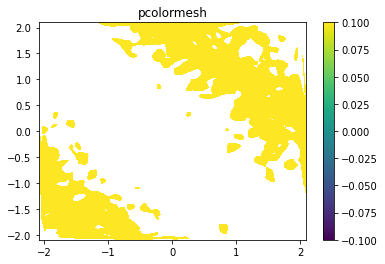

In [36]:
# create x-y points to be used in heatmap
xi = np.linspace(X.min(), X.max(), 1000)
yi = np.linspace(Y.min(), Y.max(), 1000)



y, x = np.meshgrid(xi,xi)

z = zi



z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='viridis', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()